1) What is simple linear regression?
  Simple linear regression is a statistical method used to model the relationship between two variables by fitting a straight line to the data. One variable is independent , and the other is dependent .
 ** y=mx+c**

2)What are the key assumptions of Simple Linear Regression?
  Key assumptions of Simple Linear Regression are:
  - The relationship between the independent variable X and the dependent variable Y is linear.
  - The residuals (errors) are independent of each other.
  - The residuals should be normally distributed.
     
3) What is heteroscedasticity, and why is it important to address in regression models?
   Heteroscedasticity refers to a condition in regression analysis where the variance of  the residuals (errors) is not constant across all levels of the independent variable.Addressing it is crucial because it can distort statistical tests and lead to unreliable predictions.

4) What is Multiple Linear Regression?
   Multiple Linear Regression (MLR) is a statistical technique used to model the relationship  between one dependent variable and two or more independent variables.It extends simple linear regression by allowing multiple predictors to explain the variation in the outcome.

5) What is polynomial regression, and how does it differ from linear regression?
  Polynomial regression is a type of regression analysis that models the relationship between the independent variable and the dependent variable as an nth-degree polynomial,allowing for curved trends. Unlike linear regression, which fits a straight line,polynomial regression fits a curve to capture more complex patterns.

  


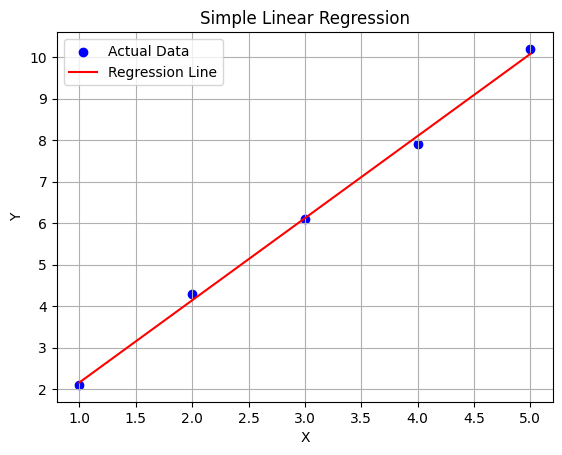

In [1]:
#Question 6:  Implement a Python program to fit a Simple Linear Regression model to
#the following sample data:
#● X = [1, 2, 3, 4, 5]
#● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
#Plot the regression line over the data points.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Reshape for sklearn
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Predict values
Y_pred = model.predict(X)

# Plotting
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
#Question 7: Fit a Multiple Linear Regression model on this sample data:
#● Area = [1200, 1500, 1800, 2000]
#● Rooms = [2, 3, 3, 4]
#● Price = [250000, 300000, 320000, 370000]
#Check for multicollinearity using VIF and report the results.
#(Include your Python code and output in the code box below.)
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Sample data
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}

df = pd.DataFrame(data)

# Independent variables
X = df[['Area', 'Rooms']]
y = df['Price']

# Fit Multiple Linear Regression
model = LinearRegression()
model.fit(X, y)

# Print coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(X.columns, model.coef_)))

# Add constant for VIF calculation
X_const = sm.add_constant(X)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)

Intercept: 103157.89473684214
Coefficients: {'Area': np.float64(63.15789473684211), 'Rooms': np.float64(34736.842105263146)}

Variance Inflation Factor (VIF):
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


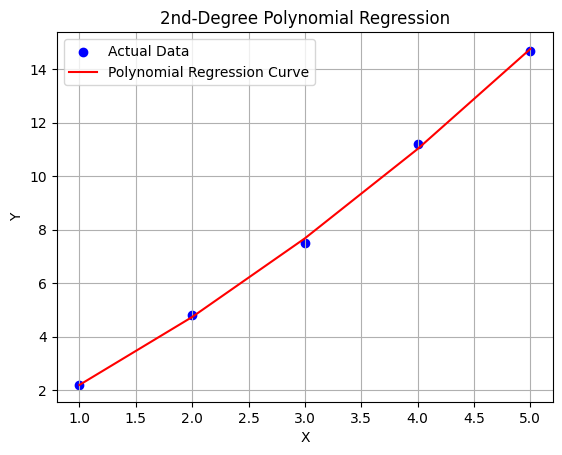

In [3]:
#Question 8:  Implement polynomial regression on the following data:
#● X = [1, 2, 3, 4, 5]
#● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
#Fit a 2nd-degree polynomial and plot the resulting curve.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transform input features to polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Predict values
Y_pred = model.predict(X_poly)

# Plotting
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Polynomial Regression Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2nd-Degree Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

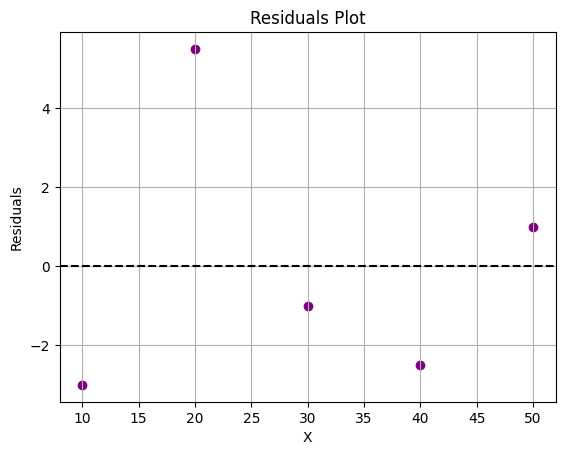

In [4]:
#Question 9: Create a residuals plot for a regression model trained on this data:
#● X = [10, 20, 30, 40, 50]
#● Y = [15, 35, 40, 50, 65]
#Assess heteroscedasticity by examining the spread of residuals.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit the model
model = LinearRegression()
model.fit(X, Y)

# Predict values
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Plot residuals
plt.scatter(X, residuals, color='purple', marker='o')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.
ans 1. Fix Heteroscedasticity
      - Log transform the target: use log(Price) instead of Price.
      - Use Weighted Least Squares (WLS) to give less weight to noisy data.
      - Use robust standard errors to protect your model’s accuracy.
    2. Fix Multicollinearity
      -  Drop one feature if two are highly correlated (e.g., keep Area, drop Rooms).
      -  Combine features like Area per Room.
      - Use Ridge or Lasso regression to reduce the effect of similar features.
      - Check VIF scores to find which features are causing trouble.
    3. Validate the Model
      -  Use cross-validation to test stability.
      - Check metrics like R², RMSE, and residual plots

